# Модель движения машин по кругу без визуализации.

In [38]:
import time
import random
import numpy as np
import math

In [39]:
v_max = 240 # максимальная скорость
l_min = 20 + 20 # мин расстояние до след. машины
t = 0.1 # время опроса
alpha = 0.3 # коэффициент ускорения

In [40]:
class car():    
    def nearest_cars(self):
        n_h = None 
        n_t = None 
        p_h = None 
        p_t = None
        l_next_h = 10000
        l_prev_h = -10000
        l_next_t = 10000
        l_prev_t = -10000
        for car_ in self.cars_list:
            if (self.line == car_.line):
                if car_.x - self.x < 0:
                    if car_.x - self.x > l_prev_h:
                        l_prev_h = car_.x - self.x
                        p_h = car_
                if car_.x - self.x > 0:
                    if car_.x - self.x < l_next_h:
                        l_next_h = car_.x - self.x
                        n_h = car_
            else:
                if car_.x - self.x < 0:
                    if car_.x - self.x > l_prev_t:
                        l_prev_t = car_.x - self.x
                        p_t = car_
                if car_.x - self.x >= 0:
                    if car_.x - self.x < l_next_t:
                        l_next_t = car_.x - self.x
                        n_t = car_
        # теперь краевые случаи
        if n_h == None:
            x_tmp = self.x
            for car_ in self.cars_list:
                if (car_.x < x_tmp) & (car_.line == self.line):
                    x_tmp = car_.x
                    n_h = car_
        if n_t == None:
            x_tmp = self.x
            for car_ in self.cars_list:
                if (car_.x < x_tmp) & (car_.line != self.line):
                    x_tmp = car_.x
                    n_t = car_
        if p_h == None:
            x_tmp = self.x
            for car_ in self.cars_list:
                if (car_.x > x_tmp) & (car_.line == self.line):
                    x_tmp = car_.x
                    p_h = car_
        if p_t == None:
            x_tmp = self.x
            for car_ in self.cars_list:
                if (car_.x > x_tmp) & (car_.line != self.line):
                    x_tmp = car_.x
                    p_t = car_
            
        result = [n_h, n_t, p_h, p_t]
        return(result)
    
    def __init__(self, x0, v0, line, cars_list):
        self.size = [20, 10]
        self.v = v0
        self.x = x0
        self.line = line
        self.a = 0
        self.cars_list = cars_list
        n_cars = self.nearest_cars()
        self.next_here = None # ссылка на следующуу машину в этом ряду
        self.next_there = None # ссылка на следующую машину в соседнем ряду
        self.prev_here = None 
        self.prev_there = None
        
        if line == 1:
            self.y = 240
        else:
            self.y = 260
        
    def obgon(self):
        if self.line == 1:
            self.line = 2
            dy = 20
            self.y = 260
        else:
            self.line = 1
            dy = -20
            self.y = 240
        
        n_cars = self.nearest_cars()
        self.next_here = n_cars[0] 
        self.next_there = n_cars[1]
        self.prev_here = n_cars[2] 
        self.prev_there = n_cars[3]
            
    def draw(self):
        #---------------1-------------
        n_cars = self.nearest_cars()
        self.next_here = n_cars[0] 
        self.next_there = n_cars[1]
        self.prev_here = n_cars[2] 
        self.prev_there = n_cars[3]
        
        self_l = self.next_here.x - self.x
        #--------------2-------------
        dx = self.v * t + (self.a * (t**2))/2
        old_x = self.x
        self.x = self.x + dx
        #--------------3------------
        self.l = self.next_here.x - self.x
        if self.l <= l_min + 10:
            if (self.next_there.x - self.x > l_min*2) & (self.x - self.prev_there.x > l_min*2):
                self.obgon()
        
        la = self.l - l_min - 40 # здесь задается расстояние для рассчета ускорения
        anew = la * alpha
        vnew = self.v + self.a * t
        if vnew < 0:
            vnew = 0
        if (vnew > v_max):
            vnew = v_max
            anew = 0
        if (self.l < l_min):
            vnew = self.next_here.v
            self.l = l_min
            
        self.v = vnew
        self.a = anew
        #-------------4--------------
        delta = (self.x % 5000) - old_x % 5000  

In [41]:
# задать массив скоростей
arv = []
for i in range(100):
    arv.append(150)

# задать массив координат
while(1):
    ar = []
    for i in range(100):
        ar.append(int(random.uniform(0, 5000)))
    ar = sorted(ar)
    for i in range(99):
        if ar[i + 1] - ar[i] < l_min:
            continue
    break

# задать массив полосы
lines = []
for i in range(100):
    lines.append(random.randint(1, 2))

In [42]:
cars = []
for i in range(100):
    car_ = car(ar[i], arv[i], lines[i], cars)
    cars.append(car_)
for car_ in cars:
    n_cars = car_.nearest_cars()
    car_.next_here = n_cars[0] # ссылка на следующуу машину в этом ряду
    car_.next_there = n_cars[1] # ссылка на следующую машину в соседнем ряду
    car_.prev_here = n_cars[2] 
    car_.prev_there = n_cars[3]

In [43]:
# функция, считающая среднее значение скорости
def v_sr(cars):
    res = 0
    for c in cars:
        res += c.v
    res = res/len(cars)
    return res

# среднее значение vi - vi+1
def v_razn(cars):
    res = 0
    for c in cars:
        razn = c.v - c.next_here.v
        res += razn
    res = res/len(cars)
    return res

# среднее значение vi/vi+1
def v_del(cars):
    res = 0
    for c in cars:
        d = c.v / c.next_here.v
        res += d
    res = res/len(cars)
    return res

# Пробка
def prob(cars):
    len_uch = 5000/5
    res = []
    dor = 0
    for uch in range(1, 6):
        res_uch = 0
        for c in cars:
            if c.x%5000 < dor + uch*len_uch and c.x%5000 >= dor:
                res_uch += 1
        res.append(res_uch)
        dor += len_uch
    return max(res)

In [44]:
pr = []
v = []
v_v1 = []
v_v1_del = []
for _ in range(3000):
    for i in range(100):
        cars[i].draw()
    pr.append(prob(cars))
    v.append(v_sr(cars))
    v_v1.append(v_razn(cars))
    v_v1_del.append(v_del(cars))
    

In [47]:
np.shape(pr)

(3000,)

In [48]:
np.shape(v)

(3000,)

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

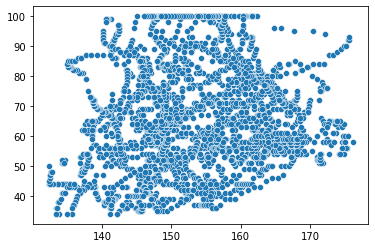

In [62]:
sns.scatterplot(v, pr)

In [64]:
import pandas as pd

In [68]:
df = pd.DataFrame()
df['pr'] = pr
df['v'] = v
df['v_v1'] = v_v1
df['v_v1_del'] = v_v1_del

In [69]:
df

,pr,v,v_v1,v_v1_del
0,52,150.000000,0.000000,1.000000
1,54,150.672300,0.074400,1.000728
2,55,151.603992,0.142688,1.001506
3,55,152.530649,0.210591,1.002455
4,56,153.418913,0.278212,1.003572
...,...,...,...,...
2995,41,134.649855,-0.639395,0.998011
2996,43,135.000317,-0.655509,0.997922
2997,43,135.283960,-0.671063,0.997850
2998,44,135.403535,-0.685814,0.997797


ModuleNotFoundError: No module named 'statsmodels'

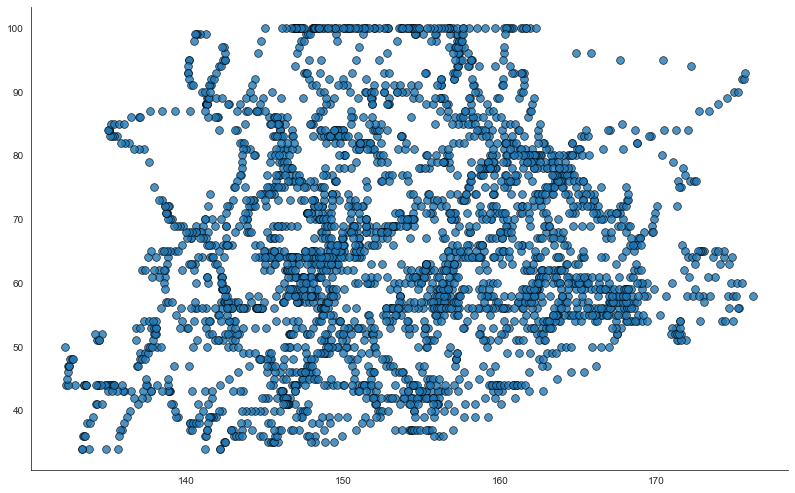

In [73]:
sns.set_style("white")
gridobj = sns.lmplot(x="v", y="pr", data=df, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


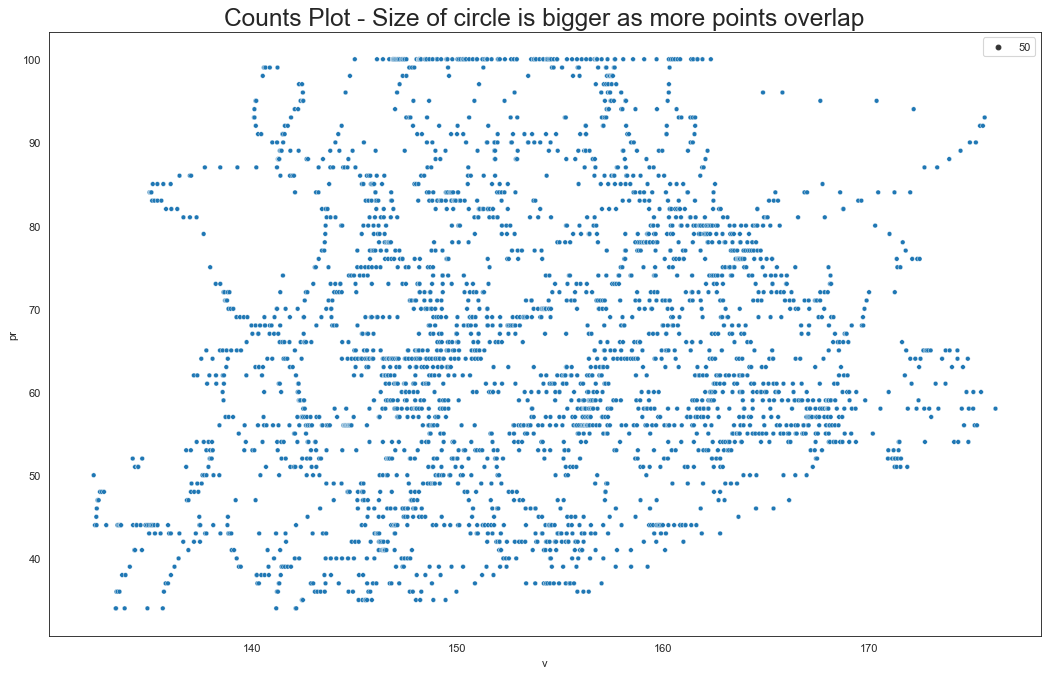

In [79]:
df_counts = df.groupby(['pr', 'v']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.scatterplot(df_counts.v, df_counts.pr, size=50, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

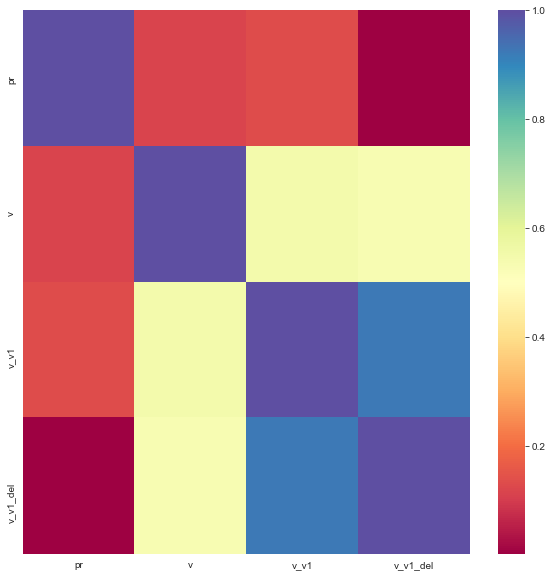

In [80]:
plt.figure(figsize=(10, 10))
sub_sample_corr = df.corr()
sns.heatmap(sub_sample_corr, cmap='Spectral')
plt.show()

C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000017ACCCEB518>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000017ACCD409E8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys


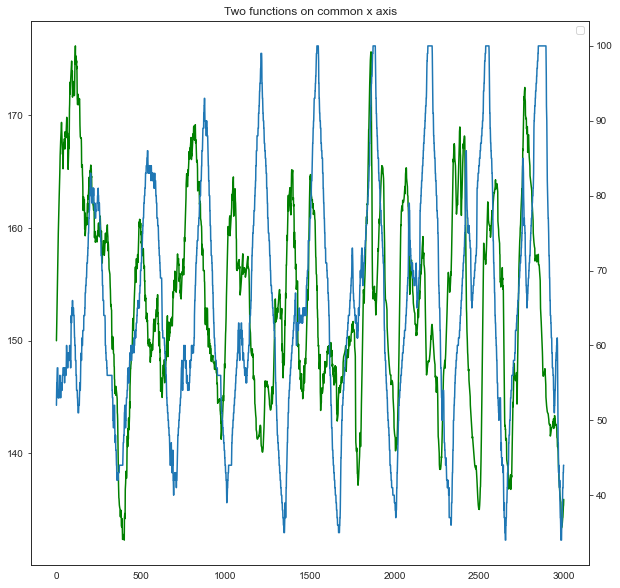

In [94]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)
v_ = ax1.plot(v, color = 'g', label = 'скорость')
ax2 = ax1.twinx()
pr_ = ax2.plot(pr, label = 'пробки')
plt.title('Two functions on common x axis')
plt.legend((v_, pr_), ('скорость', 'пробки'))
plt.show()

C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000017ACC8702E8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000017ACC810240>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


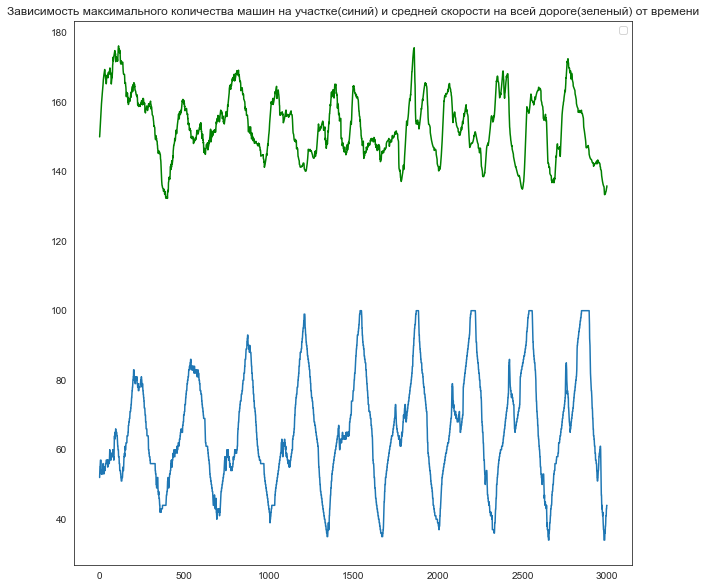

In [97]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)
v_ = ax1.plot(v, color = 'g', label = 'скорость')
pr_ = ax1.plot(pr, label = 'пробки')
plt.title('Зависимость максимального количества машин на участке(синий) и средней скорости на всей дороге(зеленый) от времени')
plt.legend([v_, pr_], ['скорость', 'пробки'])
plt.show()

C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000017ACBA98908>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000017ACB6B8518>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


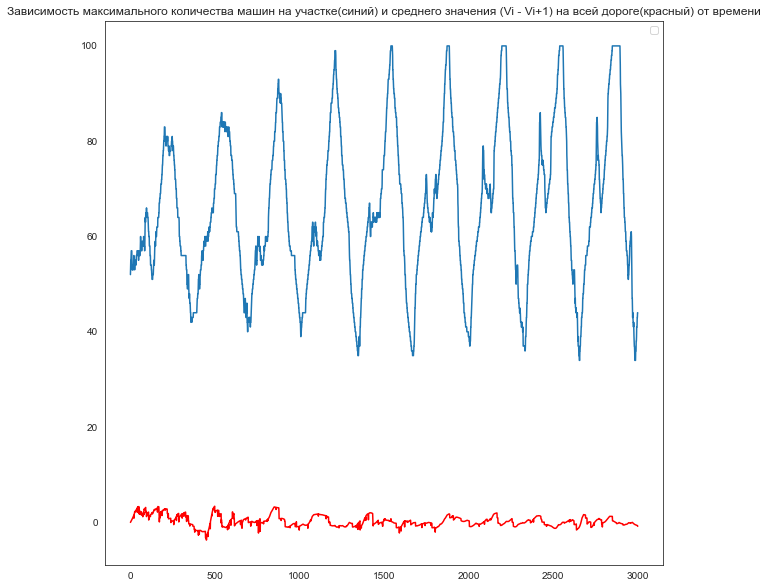

In [99]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)
v_ = ax1.plot(v_v1, color = 'r', label = 'скорость')
pr_ = ax1.plot(pr, label = 'пробки')
plt.title('Зависимость максимального количества машин на участке(синий) и среднего значения (Vi - Vi+1) на всей дороге(красный) от времени')
plt.legend([v_, pr_], ['скорость', 'пробки'])
plt.show()

In [111]:
v1_ = []

In [112]:
for i in v_v1_del:
    v1_.append(i*100)

In [113]:
np.shape(v1_)

(3000,)

C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000017ACC889F98>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000017ACBA55278>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


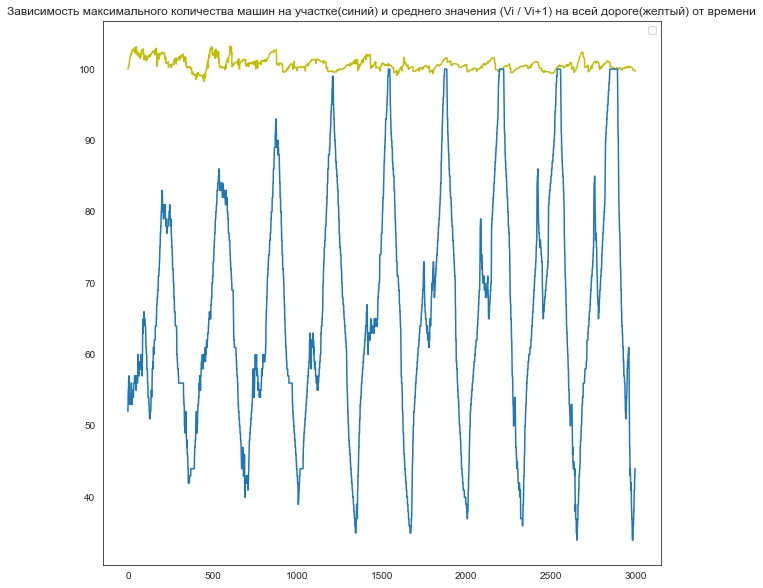

In [114]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)
v_ = ax1.plot(v_v1_del, color = 'y', label = 'скорость')
pr_ = ax1.plot(pr, label = 'пробки')
plt.title('Зависимость максимального количества машин на участке(синий) и среднего значения (Vi / Vi+1) на всей дороге(желтый) от времени')
plt.legend([v_, pr_], ['скорость', 'пробки'])
plt.show()

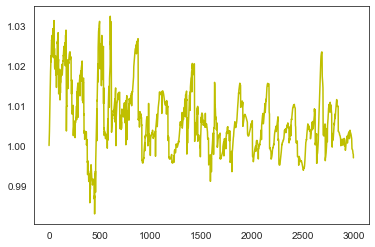

In [104]:
plt.plot(v_v1_del, 'y')